In [1]:
import numpy as np
import pandas as pd
import json
from seaborn import pairplot

In [2]:
name = 'gru_gender_1'

In [3]:
df = pd.DataFrame()

In [4]:
path = name + '/configs/exp_'

In [5]:
for i in range(500):
    path = name + f'/configs/exp_{i}/'
    path_metrics = path + 'res_exp.json'
    path_params = path + 'params.json'
    
    with open(path_metrics) as f:
        data_metric = json.load(f)
        
    with open(path_params) as f:
        data_params = json.load(f)    

    data = {**data_metric, **data_params}
    df = df.append(data, ignore_index=True)

In [6]:
df.head()

,ME,Mean_WER,NAD,PD,aNAD-1000,num_samples,num_tokens_to_add,temperature,total_amount
0,0.345,6.0,0.057500,0.080745,0.007381,110.0,6.0,1.444444,46741.405709
1,0.410,7.0,0.058571,0.088753,0.006558,180.0,7.0,2.777778,62516.790419
2,0.465,9.0,0.051667,0.110739,0.012273,190.0,9.0,3.222222,37888.655644
3,0.370,6.0,0.061667,0.071610,0.008892,180.0,6.0,3.666667,41611.140186
4,0.305,3.0,0.101667,0.026063,0.026160,40.0,3.0,1.000000,11659.006022


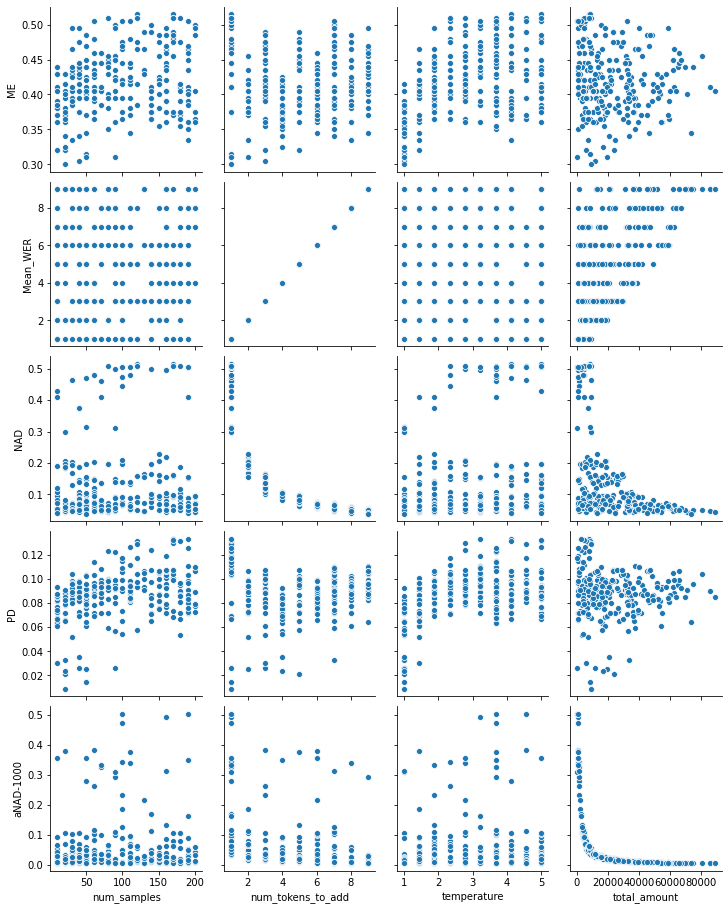

In [7]:
sns_plot = pairplot(df, 
                    x_vars=['num_samples', 'num_tokens_to_add', 'temperature', 'total_amount'],
                    y_vars=['ME', 'Mean_WER', 'NAD', 'PD', 'aNAD-1000'])

In [9]:
sns_plot.savefig(name+".pdf")